#### Bibliotecas

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np
from neural_network_lib.neural_network import NeuralNetwork

#### Tratamento dos dados

In [4]:
# Carregar CSV
df_pokemon = pd.read_csv('../../datasets/pokemon/pokemon_alopez247.csv')

# Verificar carregamento do arquivo
print(df_pokemon.head())

   Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45   

In [5]:
# Mostrar a colunas do dataframe
print(df_pokemon.columns)

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')


In [46]:
# Remover colunas irrelevantes
df = df_pokemon.drop(columns=[ 'Name', 'Total', 'Color', 'Body_Style', 'Pr_Male', 'Catch_Rate', 'Type_1', 'Defense', 'Egg_Group_1', 'Egg_Group_2', 'Sp_Atk', 'Sp_Def', 'isLegendary', 'hasGender', 'hasMegaEvolution' ])

#Preencher valores nulos em Type_2
df['Type_2'] = df['Type_2'].fillna('None')

# Separar as caracteristicas e a variável altura
height = df['Height_m'].values.reshape(-1, 1)
weight = df['Weight_kg']
features = df.drop(columns=['Height_m'])

In [47]:
# Mostrar a colunas do dataframe após ajustes
print(features.columns)

Index(['Number', 'Type_2', 'HP', 'Attack', 'Speed', 'Generation', 'Weight_kg'], dtype='object')


In [48]:
# Transformar as variaveis categoricas
features_encoded = pd.get_dummies(features, columns=[ 'Type_2', 'Generation'], drop_first=True)

In [49]:
# Normalizar dados numericos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

In [50]:
# Normalizar a variável de saída (height)
target_scaler = StandardScaler()
height_scaled = target_scaler.fit_transform(height).flatten()

In [51]:
# Transformação logarítmica
height_log = np.log1p(df['Height_m'].values.reshape(-1, 1))

# Normalizar a variavel de saída logaritma
height_scaled_log = target_scaler.fit_transform(height_log).flatten()

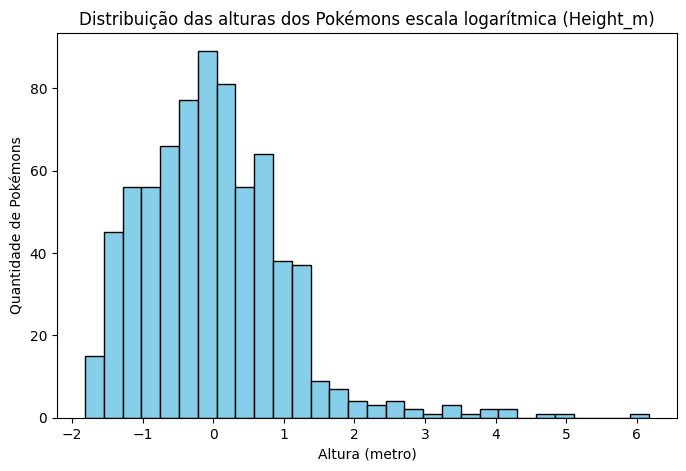

In [112]:
# Histograma da altura log
plt.figure(figsize=(8,5))
plt.hist(height_scaled_log, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição das alturas dos Pokémons escala logarítmica (Height_m)')
plt.xlabel('Altura (metro)')
plt.ylabel('Quantidade de Pokémons')
plt.show()

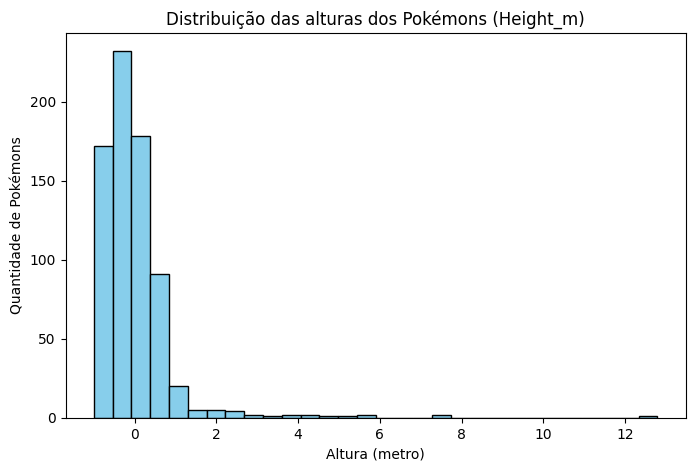

In [53]:
# Histograma da altura
plt.figure(figsize=(8,5))
plt.hist(height_scaled, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição das alturas dos Pokémons (Height_m)')
plt.xlabel('Altura (metro)')
plt.ylabel('Quantidade de Pokémons')
plt.show()

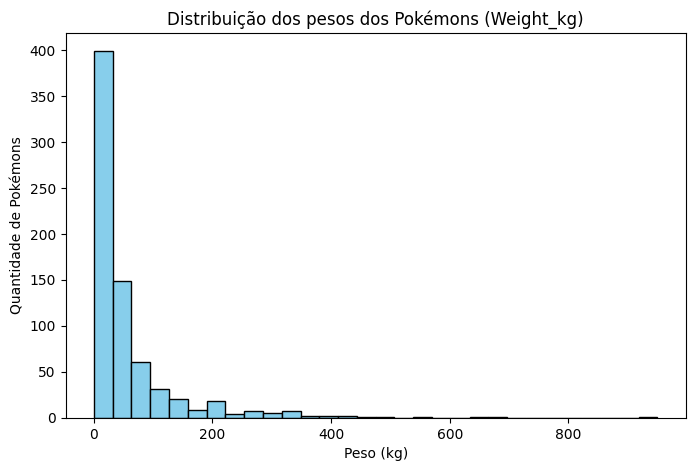

In [54]:
# Histograma do peso
plt.figure(figsize=(8,5))
plt.hist(weight, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos pesos dos Pokémons (Weight_kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Quantidade de Pokémons')
plt.show()

In [55]:
#Criar bins baseados nos quartis
quartis = np.quantile(height_scaled_log, [0, 0.25, 0.5, 0.75, 1])

print ("Faixas sugeridas (quartis):", quartis)

Faixas sugeridas (quartis): [-1.81553276 -0.66608454 -0.02666931  0.53861628  6.16742339]


In [56]:
# Criar bins com base nos quartis
labels = [0,1,2,3]
height_binned = pd.cut(height_scaled_log, bins=quartis, labels=labels, include_lowest=True)

# Verificar balanceamento
print(height_binned.value_counts())

0    238
1    166
2    137
3    180
Name: count, dtype: int64


In [66]:
# Realizar o split estratificado
features_train, features_test, height_train, height_test = train_test_split(
    features_scaled, height_scaled_log, test_size=0.2, random_state=42) # , stratify=height_binned

# garantir que y tenha duas dimensões
height_train = height_train.reshape(-1, 1)
height_test = height_test.reshape(-1, 1)

#### Biblioteca Criada

In [127]:
nn = NeuralNetwork(hidden_layers=(128, 64, 32), hidden_activation=['tanh', 'tanh', 'tanh'],
                     loss='mse', 
                     model_type='regression',
                     learning_rate=0.001,
                     max_iter=50000)

0.001


In [128]:
nn.fit(features_train, height_train)

['tanh', 'tanh', 'tanh', 'identity']
Epoch 0, Loss: 4.57259223782477
Epoch 1000, Loss: 3.3929148877638524
Epoch 2000, Loss: 2.6312034544499796
Epoch 3000, Loss: 2.123780412429038
Epoch 4000, Loss: 1.7751773063927527
Epoch 5000, Loss: 1.5282268376341286
Epoch 6000, Loss: 1.3479053948041697
Epoch 7000, Loss: 1.2123082739595556
Epoch 8000, Loss: 1.1074667868981138
Epoch 9000, Loss: 1.0243023006315617
Epoch 10000, Loss: 0.9568008346045117
Epoch 11000, Loss: 0.9009002840965012
Epoch 12000, Loss: 0.8538015029034454
Epoch 13000, Loss: 0.8135355922494394
Epoch 14000, Loss: 0.7786883154287892
Epoch 15000, Loss: 0.7482221728011612
Epoch 16000, Loss: 0.7213599521822088
Epoch 17000, Loss: 0.6975074553525253
Epoch 18000, Loss: 0.6762014939833357
Epoch 19000, Loss: 0.6570743826333462
Epoch 20000, Loss: 0.6398293333460014
Epoch 21000, Loss: 0.6242231434167079
Epoch 22000, Loss: 0.6100538237921737
Epoch 23000, Loss: 0.5971516175010031
Epoch 24000, Loss: 0.5853723747786933
Epoch 25000, Loss: 0.57459258

In [129]:
height_pred_original_nn = nn.predict(features_test)
height_pred_original_nn = target_scaler.inverse_transform(height_pred_original_nn.reshape(-1, 1)).flatten()
#height_pred_test_true = target_scaler.inverse_transform(height_test.reshape(-1, 1)).flatten()
height_pred_test_true = np.expm1(height_pred_original_nn).flatten()

In [130]:
mse = mean_squared_error(height_pred_test_true, height_pred_original_nn)
mae = mean_absolute_error(height_pred_test_true, height_pred_original_nn)
r2 = r2_score(height_pred_test_true, height_pred_original_nn)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

MSE: 0.2303
MAE: 0.3566
R² Score: 0.3059


In [131]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Evita divisão por zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape = mean_absolute_percentage_error(height_pred_test_true, height_pred_original_nn)
print(f"MAPE: {mape:.2f}%")

MAPE: 29.29%
